# Machine Learning with SMOTE for credit card fraud detection
 Below is a code in python which implements supervised machine learning algorithms to detect credit card fraud from the bank transactions in the dataset "creditcard.csv". The purpose of this code is to print out a confusion matrix and a classification report which will measure the accuracy of these supervised algorithms in finding a fraudulent transaction
 The aim of this code is use different machine learning algorithms such as logistic regression, random forest, decision tree and naive bayes to handle heavily imbalanced data and to calculate the accuracy, precision, recall, f1 score, confusion matrix and Roc-auc score.


In [2]:
#importing neccessary packages 

import pandas as pd   
#pandas enables data to be presented in a virtual spreadsheet.

import numpy as np    
#numpy is an open-source that allows users to work with an opensource.

import matplotlib.pyplot as plt 
#matplotlib is a plotting library for graphs 

import seaborn as sns
#seaborn is used for data visualization and exploration of data 


#below are the python libaries for supervised machine learning algorithms 
from sklearn.linear_model import LinearRegression, LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier 

from sklearn.ensemble import RandomForestClassifier, VotingClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.cluster import MiniBatchKMeans, KMeans

In [3]:
#pandas is used for exploring and visualizing dataset
import pandas as pd
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 300)
pd.set_option('display.expand_frame_repr',True)

The code above prints out the dataset 'creditcard.csv' in a virtual spreadsheet. This spreadsheet has 28 variables out of 31 columns which is classified into 0 or 1 with 0 being no fraud and 1 being fraud detetecd. With reference from the spreadsheet, Time shows the number of seconds elasped between each transaction and amount the value of the transaction.

In [9]:
#data cleaning checks to dataset for any empty varaibles 
#and from the 'creditcard.csv'dataset it is null
data.isnull().values.any()

False

In [10]:
#cheacking shape of the data
data.shape

(284807, 31)

In [7]:
#uploading dataset
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [12]:
minmax = pd.DataFrame()
minmax["Maximum"] =data.max()
minmax["Minimum"] = data.min()
minmax

,Maximum,Minimum
Time,172792.000000,0.000000
V1,2.454930,-56.407510
V2,22.057729,-72.715728
V3,9.382558,-48.325589
V4,16.875344,-5.683171
V5,34.801666,-113.743307
V6,73.301626,-26.160506
V7,120.589494,-43.557242
V8,20.007208,-73.216718
V9,15.594995,-13.434066


In [13]:
#heatmap
#import seaborn as sns
#import matplotlib.pyplot as plt 

#plt.figure(figsize = (13,6))
#plt.title("heatmap")
#sns.heatmap(data = data,
        #   annot = True)
#plt.xlabel = data

 Data Visualisation is applied to the code below to observe how the dataset is balanced since it is unevenly distributed. The First code snipet below shows that the dataset is highly imbalanced with the number of non-fraud cases being extremely high as comapred to number of fraud detected. In the second graph, SMOTE() is applied to the dataset to have it oversampled.

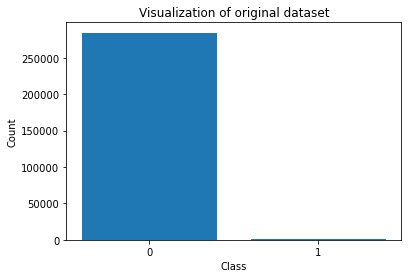

In [8]:
#data visualisation
#class balancing, since this is a classification problem balncing of class is essential 
#to prevent biasing of model.
targets, count = np.unique(data.Class, return_counts = True)
plt.title("Visualization of original dataset")
plt.xlabel("Class")
plt.ylabel("Count")
plt.bar([str(i) for i in targets],count)   
plt.show()

In [4]:
pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.10.1-py3-none-any.whl (226 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
Note: you may need to restart the kernel to use updated packages.


In [6]:
print(data["Class"].value_counts())

NameError: name 'data' is not defined

In [ ]:
#separating dataset into training and testing variables 
from sklearn.model_selection import train_test_split

features = data[data.columns[:len(data.columns)-1]].to_numpy()
targets = data.Class.to_numpy()
Orig_X_train, X_test, Orig_Y_train, Y_test = train_test_split(features, targets,test_size = 0.3,
                                                    shuffle=True)

In [3]:
from imblearn.over_sampling import SMOTE
import pandas as pd

X_train,Y_train = SMOTE().fit_resample(Orig_X_train,Orig_Y_train)
targets = targets.reshape(-1,1)

target_un,count = np.unique(targets,return_counts=True)
plt.title("Balancing dataset with SMOTE")
plt.xlabel("Class")
plt.ylabel("Count")
plt.bar([str(i) for i in target_un],
        count)
plt.show()

ModuleNotFoundError: No module named 'imblearn'

In [2]:
#target_un,count = np.unique(targets,return_counts=True)
#plt.title("Balancing dataset with SMOTE")
#plt.xlabel("Class")
#plt.ylabel("Count")
#plt.bar([str(i) for i in target_un],count)
#plt.show()

In [1]:


print("training dataset :",  len(X_train))
print("training label size :", len(Y_train))
print("test feature size :", len(X_test))
print("test label size :", len(Y_test))

NameError: name 'X_train' is not defined

# Algorithm 1: logistic Regression
Logistic regression is a classification algorithm which assigns observations to the dataset of credit card fraud based on the concept of probability.  logistic regression ensures accuracy by handling dirty data. 
The goal of this algorithm is to present a confusion matrix which shows the number of fraud detected compared to fraud not detected. 
 In the code snipet below,  I have implemented logisitc regression algorithm on the original unbalanced dataset and the balanced dataset using SMOTE() and compare the results at the end.

In [ ]:
#logistic regression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
logisticReg = LogisticRegression()
logisticReg.fit(X_train, Y_train)
prediction = logisticReg.predict(X_test)
print(confusion_matrix(Y_test, prediction))


matrix = confusion_matrix(logisticReg.predict(X_test), Y_test)
cm = ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels=["No - Fraud","Fraud"])

cm.plot()
plt.title("Logistic Regression - Confusion Matrix(SMOTE)")
plt.show()


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,prediction))
print(accuracy_score(Y_test,prediction))

In [ ]:
#logistic regression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
logisticReg = LogisticRegression()
logisticReg.fit(Orig_X_train, Orig_Y_train)
prediction = logisticReg.predict(X_test)
print(confusion_matrix(Y_test, prediction))


matrix = confusion_matrix(logisticReg.predict(X_test), Y_test)
cm = ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels=["Not detected","Not Fraud"])

cm.plot()
plt.title("Logistic Regression - Confusion Matrix(unbalanced)")
plt.show()



 In the code above, an object of the logistic regression model belonging to the sklearn library is created 'logisticReg'. the fit function of the class is used to train the original variables 'Orig_X_train', 'Orig_Y_train". and the 'prediction' function gives a prediction for the values of the testing set.

In [ ]:
#calculating precison and recall for the dataset 
from sklearn.metrics import classification_report
print(classification_report(Y_test,prediction))
print(accuracy_score(Y_test,prediction))

In [ ]:
#Decision Tree

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier



#DecisionTree
DecisionTree = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
DecisionTree.fit(Orig_X_train,Orig_Y_train)
prediction = DecisionTree.predict(X_test)
print(confusion_matrix(Y_test, prediction))

#confusion matrix
matrix = confusion_matrix(DecisionTree.predict(X_test), Y_test)
cm = ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels=["Not detected","Not Fraud"])
cm.plot()
plt.title("Confusion Matrix (original dataset)")
plt.show()



In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,prediction))
print(accuracy_score(Y_test,prediction))

In [ ]:
#Decision Tree for balanced dataset

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier

#DecisionTree
DecisionTree = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
DecisionTree.fit(X_train,Y_train)
prediction = DecisionTree.predict(X_test)
print(confusion_matrix(Y_test, prediction))

#confusion matrix
matrix = confusion_matrix(DecisionTree.predict(X_test), Y_test)
cm = ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels=["Not detected","Not Fraud"])
cm.plot()
plt.title("Confusion Matrix (balanced dataset)")
plt.show()



In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,prediction))
print(accuracy_score(Y_test,prediction))

In [ ]:
#Random Forest
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier, VotingClassifier


#Random Forest
RandomForest = RandomForestClassifier(max_depth  = 5)
RandomForest.fit(Orig_X_train,Orig_Y_train)
prediction = RandomForest.predict(X_test)
print(confusion_matrix(Y_test,prediction))

#ConfusionMatrix
matrix = confusion_matrix(RandomForest.predict(X_test), Y_test)
cm = ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels=["Not detected","Not Fraud"])
cm.plot()
plt.title("Confusion Matrix (Original Dataset)")
plt.show()


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,prediction))
print(accuracy_score(Y_test,prediction))

In [ ]:
#Random Forest
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

#Random Forest
RandomForest = RandomForestClassifier(max_depth  = 5)
RandomForest.fit(X_train,Y_train)
prediction = RandomForest.predict(X_test)
print(confusion_matrix(Y_test,prediction))

#ConfusionMatrix
matrix = confusion_matrix(RandomForest.predict(X_test), Y_test)
cm = ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels=["Not detected","Not Fraud"])
cm.plot()
plt.title("Confusion Matrix (Balanced Dataset)")
plt.show()


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,prediction))
print(accuracy_score(Y_test,prediction))